# **Project 2**, APS1070 Summer 2023
**Default Detection Algorithm using Gaussian Mixture Model [14 Marks]**

**Deadline: June 16, 11 PM**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

##**Part 1: Getting started [2 Marks]**

We are going to work with a credit card default [dataset](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients) of clients. This dataset contains 23 key features, which are not
directly interpretable but contain meaningful information about the dataset.

Load the dataset in CSV file using Pandas. The dataset is called `deafult.csv`. Print out the first few columns of the dataset.

* How many rows are there?  **[0.1]**
  * There is 30,000 rows in the dataset


* Which column contains the targets? **[0.1]**
  * column 'Y' contains the target variable and consists of two classes [0,1].

* What is the meaning of target values? **[0.2]**
  * A target equal to 0 represents the non_default class of customers whereas a target equal to 1 represents the default class of customers.



In [7]:
pip install wget


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import wget

wget.download('https://github.com/APS1070-W23/datasets/raw/main/default.tar.gz','default.tar.gz')

'default.tar (1).gz'

In [9]:
!tar -zxvf default.tar.gz

./
./default.csv


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import seaborn as sns
df = pd.read_csv('default.csv')

In [11]:
### YOUR CODE HERE ###

rows = df.shape[0]
print('There are ' , rows , 'rows in the dataset , each row represents a datapoint')
columns = df.columns
print('\nThe features, i.e., columns are:')
print(columns)
print("Column 'Y' represents the target variables")
col_y_class = df['Y'].unique()
print('The entries of the target column are:' , col_y_class)

There are  30000 rows in the dataset , each row represents a datapoint

The features, i.e., columns are:
Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')
Column 'Y' represents the target variables
The entries of the target column are: [1 0]


In [12]:
df.drop(['Unnamed: 0','Y'] , axis=1).describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [13]:
non_default_customer = (df['Y']==0).sum()
default_customer = (df['Y']==1).sum()

print('The percentage of non-default customers is: ', non_default_customer*100/len(df) , '%')
print('The percentage of default customers is: ', default_customer*100/len(df) , '%' )

The percentage of non-default customers is:  77.88 %
The percentage of default customers is:  22.12 %


It's important to know how many examples we have for each class when we work with a new dataset.

* What is the percentage of entries in the dataset for each class?  **[0.1]**

  * The percentage of non_default_customers is equal to 22.12% and the percentage of default_customers is equal to 77.88%.

* Is this data considered balanced or unbalanced? Why is this the case? **[0.1]**
  * The data is considered unbalanced because 1/5 of the data is for default customers whereas 4/5 of the data represents non_default customers.

* Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1?  **[0.5]**

  * This imbalance improves the classification of our algorithm on the non-default customer class. However, it could affect the performance of the KNN by classifying all new data as part of the majority class, which would yield to a high accuracy score but in fact a poor performance of the classifier.


* What metrics should we use to evaluate a model in such cases?  **[0.2]**
  * Metrics that should be used are either F1 score or precision because of the imbalance in the data. Accuracy would not be representative because most of the datapoints belong to the non_default class.


Next, split the dataset into a training (70%), validation (15%) and testing set (15%). Set the random state to 0. **[0.2]**

Make sure to separate out the column corresponding to the targets.

In [14]:
### YOUR CODE HERE ###
target = df['Y']
d = df.drop(['Y'],axis=1)

In [15]:
#Split the data
#data = (d - d.mean())/(d.std())
X_train , X_test , y_train , y_test = train_test_split(d , target , test_size = 0.15, random_state = 0, stratify = target)

In [16]:
val_ratio = 0.15 / (len(y_train) / len(df))
X_train , X_val , y_train , y_val = train_test_split(X_train , y_train , test_size = val_ratio , random_state = 0, stratify=y_train)

In [17]:
#Standardize data based on the training set.

X_test = (X_test - X_train.mean())/X_train.std()
X_val = (X_val - X_train.mean())/X_train.std()
X_train = (X_train - X_train.mean())/ X_train.std()


In [18]:
print('The number of training datapoints is:' , len(X_train))
print('The number of validation datapoints is:' , len(X_val))
print('The number of testing datapoints is:' , len(y_test))

The number of training datapoints is: 21000
The number of validation datapoints is: 4500
The number of testing datapoints is: 4500


Now, let's take a look at the difference in distribution for some variables between default and non-default clients:

X1
X2
X3
X4
X5
X6
X7
X8
X9
X10
X11
X12
X13
X14
X15
X16
X17
X18
X19
X20
X21
X22
X23


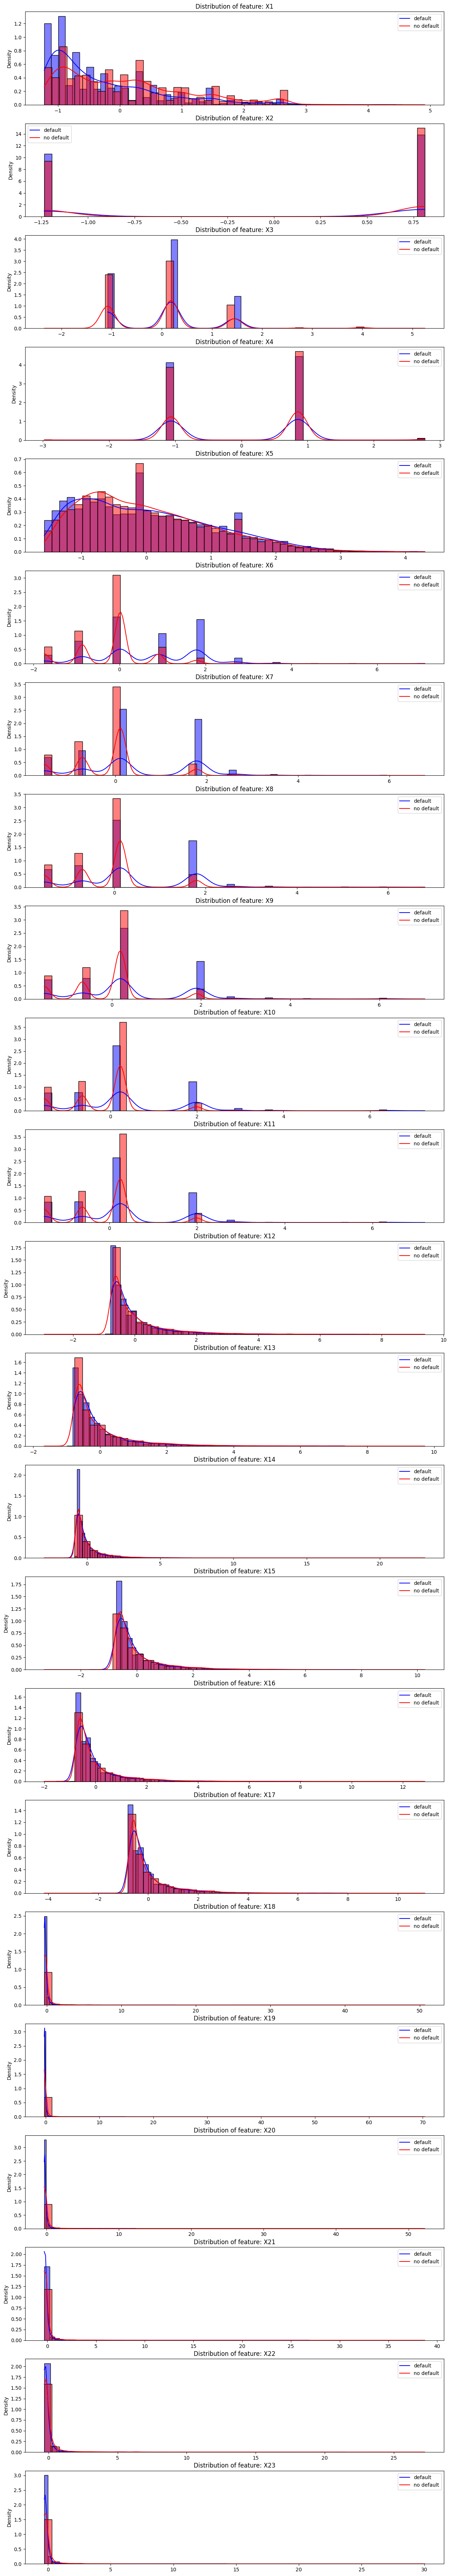

In [19]:
import matplotlib.gridspec as gridspec
features=[f for f in df.columns if not 'Y' in f and not 'Unnamed: 0' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    print(feat)
    ax = plt.subplot(gs[i])
    sns.histplot(X_train[feat][y_train==1], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_train[feat][y_train==0], stat="density", kde=True, color="red", bins=50)
    ax.legend(['default', 'no default'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Explain how these graphs could provide meaningful information about default detection using a gaussian model. **[0.5]**

  * These graphs could provide meaningful information about default detection by
  considering feautres that differ in distribution based on the class they belong to, and disregarding the others. For instance, distribution of a feature that differs in terms of variance and mean for the default and non default class should be chosen as a relevant feature to provide meaningful information about possible default detection. For instance feature X7 provides a different distribution for the default and non-default class and therefore should be chosen. Finally, those distributions can be "simplied" and fitted by a Gaussian (given a variance and mean) facilitate the classification problem. If both distributions overlap then maybe using a p-value approach would help determine if this is due to chance or not.


## **Part 2: Single feature model with one Gaussian distribution: [2 Marks]**
We'll start by making a prediction using **a single feature of our dataset at a time**.

**a. Fitting regardless of class:**
  1. Fit a single Gaussian distribution on a single feature of **the full training dataset** (both classes) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``.
  2. Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on both the full training set and validation set (including both classes).
  3. Repeat the above steps for each of the features and present your findings in a table. **[0.3]**
  4. Find the best 3 features to distinguish default credit card clients from non-default clients based on the AUC of the validation set. **[0.2]**
  5. Make a prediction based on a model's scores: If the `score_samples` is lower than a threshold, we consider that client as one that would default. Find an optimal threshold that maximizes the F1 Score of the validation set for each of those 3 features separately. (Do not check every possible value for threshold, come up with a faster way!) Compute F1 score using `sklearn.metrics.f1_score`. **[0.5]**
  6. Report the complexity of your method (Big O notation) for determining the optimal threshold.**[0.3]**
    * The complexity of determining the optimal threshold is O(n) as it is done by iterating over all values in the tr_list. However the tr_list is computed by sorting and finding the unique values of the scores_samples. The build-in numpy sorting function is of complexity O(n*log(n)) and the numpy unique function is of complexity O(n). Therefore the total algorithm complexity to determinet he optimal threshold is: 2 * O(n) + O(n*log(n))

**b. Fitting based on class:**
 1. Pick 3 features that had the best AUC in Part 2a.
 2. Compute AUC and F1 score when you fit a Gaussian **only on non-default clients** (instead of all the clients).
 3. Compare your results from parts 2a and 2b (AUC and F1 score) in a table. **[0.2]**
 4. Are these results different or similar? Why?**[0.3]**
  * These results where similar because of the imbalance present in the dataset. In other words, training on the non-default class is very close to training on both classes because the majority of datapoints belong to the non-default class. Therefore the algorithm learnt implicitely the distribution of the non default class while training on both classes.

 5. How would class imbalance affect any classifier in general (apart from just a KNN)? **[0.2]**
  * Imbalance in a dataset affects any classifier in several ways.
    * Imbalance increase classification performance of the majority class and decreases classification performance of the minority class.
    * Evaluating model based on accuracy would be misleading and rather the use of F1 score or area under the precision recall curve.In case of an imbalanced dataset, the recall rate on the minority class would be low, but precision or accuracy score can be high just by classifying all datapoints as part of the majority class.
    * The model tends to be more biased towards the majority class which makes it more prone to classifying new datapoints as part of the dominant class.




In [20]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_curve , auc, f1_score
import seaborn as sns


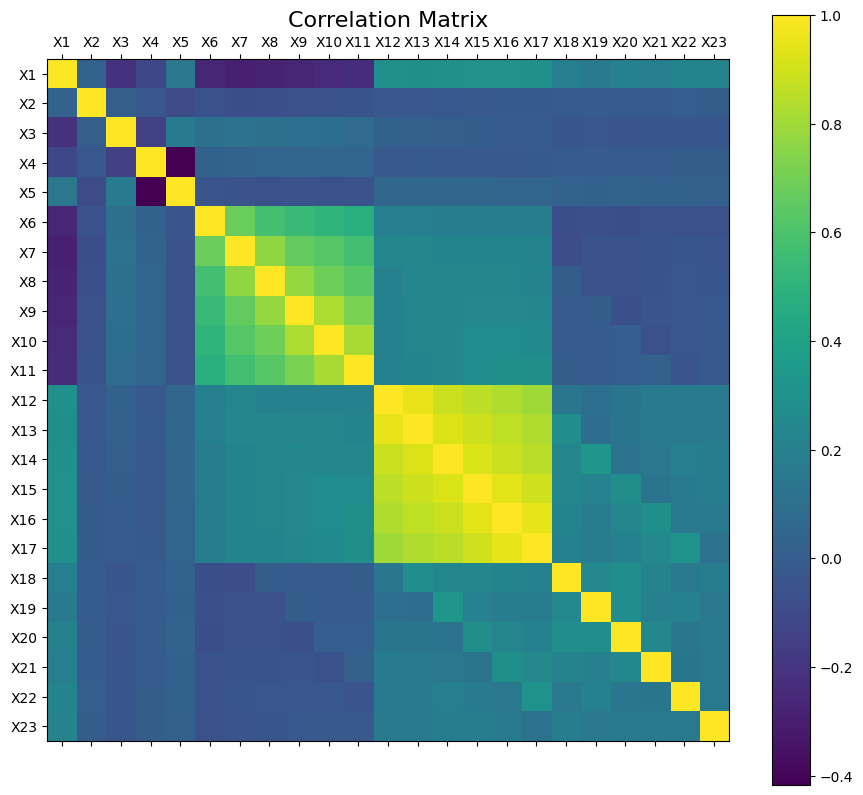

In [21]:
### YOUR CODE HERE ###

fig = plt.figure(figsize=(11, 10))
ax = fig.add_subplot()
cax = ax.matshow(X_train[features].corr())
fig.colorbar(cax)

xaxis = np.arange(len(features))
ax.set_xticks(xaxis)
ax.set_yticks(xaxis)
ax.set_xticklabels(features)
ax.set_yticklabels(features)

plt.title('Correlation Matrix', fontsize=16);

#Note: features X12 to X17 are highly correlated followed by features X6-X11

In [22]:
features = [f for f in df.columns if not 'Y' in f and not 'Unnamed: 0' in f]

## PART 2.a

# 1. fitting data to one single feature:

random_feat_indx = np.random.randint(len(features) , size=1)
random_feat = features[random_feat_indx[0]]
single_feat_train = X_train[[random_feat]]
single_feat_val = X_val[[random_feat]]
gm = GaussianMixture(n_components=1)
single_feat_fit = gm.fit(single_feat_train)
single_feat_results = gm.score_samples(single_feat_train)
single_feat_val_results = gm.score_samples(single_feat_val)

fpr_sc, tpr_sc, _ = roc_curve(y_train, 1-  single_feat_results)
fpr_sc_val, tpr_sc_val, _ = roc_curve(y_val, 1- single_feat_val_results)

# 2. Compute the AUC for the chosen feature
train_AUC = auc(fpr_sc, tpr_sc)
val_AUC = auc(fpr_sc_val, tpr_sc_val)

print("The random feature is: ", random_feat)
print("The training AUC score is :" , train_AUC)
print('The validation AUC score is: ', val_AUC )



The random feature is:  X8
The training AUC score is : 0.6179159824357464
The validation AUC score is:  0.6316935605273156


In [23]:
# 3. Repeat for all features

single_feature_train_AUC = []
single_feature_val_AUC = []


for i , f in enumerate(features):

  single_feature_train = X_train[[f]]
  single_feature_val = X_val[[f]]
  gm = GaussianMixture(n_components=1 , covariance_type='full' , random_state = 0)
  fit_result  = gm.fit(single_feature_train)
  fit_scores = gm.score_samples(single_feature_train)
  fpr_sc, tpr_sc, _ = roc_curve(y_train, -1*fit_scores)
  train_AUC = auc(fpr_sc, tpr_sc)
  single_feature_train_AUC.append(train_AUC)

  fit_scores_val = gm.score_samples(single_feature_val)
  fpr_sc_val,  tpr_sc_val, _ = roc_curve(y_val, -1*fit_scores_val)
  val_AUC = auc(fpr_sc_val,  tpr_sc_val)
  single_feature_val_AUC.append(val_AUC)


results_arr = np.array([single_feature_train_AUC , single_feature_val_AUC])


In [24]:
# Presenting results in a dataframe
results_df = pd.DataFrame(np.transpose(results_arr), index = features , columns = ['Training AUC' , 'Validation_AUC'])
results_df

,Training AUC,Validation_AUC
X1,0.521651,0.530928
X2,0.523963,0.522630
X3,0.483117,0.470557
X4,0.514530,0.519301
X5,0.530883,0.532349
X6,0.691718,0.695598
X7,0.648807,0.654126
X8,0.617916,0.631694
X9,0.601195,0.611745
X10,0.594011,0.596973


In [25]:
# 4. Finding the best three features
sorted_validation_auc = results_df['Validation_AUC'].sort_values(ascending = False)
print('The three features to with the highest AUC are: ' , sorted_validation_auc.index[:3].values)

The three features to with the highest AUC are:  ['X6' 'X7' 'X8']


In [26]:
# 5. Finding the optimal threshold

best_features = sorted_validation_auc.index[:3].values
l_list = []

for f in best_features:
  #f1_list=[]
  gm = GaussianMixture(n_components=1)
  gm.fit(X_train[[f]])

  val_feature_f = X_val[[f]]
  fit_scores_val = gm.score_samples(val_feature_f)

  tr_range = np.unique(np.sort(fit_scores_val))

  best_f1 = -9999
  best_tr = None
  for tr in tr_range:
    f1 = f1_score(y_val, fit_scores_val<=tr)

    if f1>best_f1:
      best_f1 = f1
      best_tr = tr

  l_list.append((best_f1 , best_tr))


print('The F1 score for feature' , best_features[0], 'is', l_list[0][0], ' for a threshold value of: ', l_list[0][1])
print('The F1 score for feature' , best_features[1], 'is', l_list[1][0], ' for a threshold value of: ', l_list[1][1])
print('The F1 score for feature' , best_features[2], 'is', l_list[2][0], ' for a threshold value of: ', l_list[2][1])



The F1 score for feature X6 is 0.4644897959183674  for a threshold value of:  -1.327988313056601
The F1 score for feature X7 is 0.46153846153846156  for a threshold value of:  -2.494487143120092
The F1 score for feature X8 is 0.42495367510809134  for a threshold value of:  -2.540865772119117


In [27]:
# PART 2.b

X_train_non_default = X_train[best_features][y_train==0]
y_train_non_default = y_train[y_train==0]

X_val_non_default = X_val[best_features][y_val==0]
y_val_non_default = y_val[y_val==0]

In [28]:
non_default_AUC_results = []
best_f1_list = []
tr_list = []

for feat in X_train_non_default.columns:

  f1_list_non_default = []
  gm = GaussianMixture(n_components=1)


  three_features_train_fit = gm.fit(X_train_non_default[[feat]])
  three_feat_results = gm.score_samples(X_train_non_default[[feat]])
  fpr_sc, tpr_sc, _ = roc_curve(y_train_non_default, -1 * three_feat_results)

  three_feat_val_results = gm.score_samples(X_val[[feat]])

  fpr_sc_val, tpr_sc_val, _ = roc_curve(y_val, -1 * three_feat_val_results)

  val_AUC_non_default = auc(fpr_sc_val, tpr_sc_val)
  non_default_AUC_results.append(val_AUC_non_default)

  tr_range = np.sort(np.unique(three_feat_val_results))
  f1_tr = -9999000
  best_tr = None

  for tr in tr_range:
    f1 = f1_score(y_val, three_feat_val_results<=tr)

    if f1>f1_tr:
      f1_tr=f1
      best_tr = tr

  best_f1_list.append(f1_tr)
  tr_list.append(tr)



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


In [29]:
print('The F1 score for feature' , best_features[0], 'is', best_f1_list[0], ' for a threshold value of: ', tr_list[0])
print('The F1 score for feature' , best_features[1], 'is', best_f1_list[1], ' for a threshold value of: ', tr_list[1])
print('The F1 score for feature' , best_features[2], 'is', best_f1_list[2], ' for a threshold value of: ', tr_list[2])

The F1 score for feature X6 is 0.4644897959183674  for a threshold value of:  -0.7740794497985011
The F1 score for feature X7 is 0.46153846153846156  for a threshold value of:  -0.8130863673039698
The F1 score for feature X8 is 0.42495367510809134  for a threshold value of:  -0.8317730763438796


In [30]:
# 2.3 presenting results in table

full_val_AUC = list(results_df['Validation_AUC'].loc[results_df.index.isin(best_features)])
full_val_f1_score = [f1[0] for f1 in l_list]
data = np.array([non_default_AUC_results, full_val_AUC , full_val_f1_score , best_f1_list])
data_df = pd.DataFrame(data , columns = best_features , index =['AUC on non-default class' , 'AUC on both classes' , 'F1 score on non-default class','F1 score on both classes'])

data_df

# Note that the best threshold value changes.

,X6,X7,X8
AUC on non-default class,0.695598,0.654126,0.631694
AUC on both classes,0.695598,0.654126,0.631694
F1 score on non-default class,0.464490,0.461538,0.424954
F1 score on both classes,0.464490,0.461538,0.424954


## **Part 3: One Gaussian model with multiple features: [2 Marks]**
This part is similar to Part 2, but here we will pick multiple features and set the number of components **visually**.

 1. Pick two features (say, f1 and f2).
 2. Scatter plot (plt.scatter) those features of the training set on a figure (f1 on the x-axis and f2 on the y-axis). **[0.25]**
 3. On the scatter plot color the training set based on their class (non-default blue and default red). **[0.25]**
 4. Based on your plots decide how many Gaussian components (``n_components``) you need to fit the data (focus on non-default clients). **[0.25]**

  * Note that for this section, I tried several number of components to maximize the validation AUC score, because it was not possible determine visually how many gaussians can fit the plotted data.

 5. Fit your Gaussian model on the training set (all samples).
 6. Compute AUC on both training and validation sets **[0.25]**
 7. Pick 3 new pair of features and repeat steps 2 to 6. **[0.5]**
 8. Pick the set with the highest AUC on the validation set (out of the four sets that you tried.)
 9. Find a threshold to maximize your F1 Score on the validation set.**[0.25]**
 10. Plot two seperate figures (one for the training data and one for the validation data) similar to step 3 and put a circle around outliers based on your threshold (use the code of the similar figure in tutorial) **[0.25]**

In [31]:
colors=y_train.copy()
colors[colors == 0] = 'b'
colors[colors == 1] = 'r'

In [32]:
### YOUR CODE HERE ###
def plot_two_features(two_feature_dataset , random_two_features):
  plt.scatter(two_feature_dataset.iloc[:,0], two_feature_dataset.iloc[:,1],c=colors)
  plt.xlabel(random_two_features[0])
  plt.ylabel(random_two_features[1])
  plt.title(f'Two features: {random_two_features}')


In [33]:
def Gauss_mix(two_feature_dataset = data  , num_comp=1):

  gm = GaussianMixture(n_components=num_comp , random_state = 0)
  two_feature_fit = gm.fit(two_feature_dataset)
  two_feature_scores = gm.score_samples(two_feature_dataset)

  two_feature_val = X_val[two_feature_dataset.columns]
  two_feature_val_scores = gm.score_samples(two_feature_val)

  fpr_sc, tpr_sc, _ = roc_curve(y_train, -1 * two_feature_scores)
  fpr_sc_val, tpr_sc_val, _ = roc_curve(y_val, -1 * two_feature_val_scores)

  twof_training_AUC = auc(fpr_sc, tpr_sc)
  twof_valAUC = auc(fpr_sc_val, tpr_sc_val)

  return twof_training_AUC , twof_valAUC, two_feature_scores, two_feature_val_scores


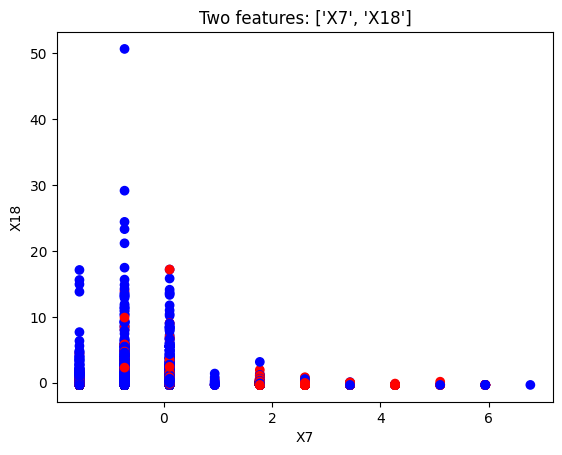

In [34]:
random_two_features1 = ['X7' , 'X18']
two_feature_dataset1 = X_train[random_two_features1]
plot_two_features(two_feature_dataset1 , random_two_features1)


1 components best fit the data yielding the highest validation AUC score


In [35]:
twof_training_AUC1 , twof_valAUC1,two_feature_scores1,two_feature_val_scores1 = Gauss_mix(two_feature_dataset1 , num_comp = 1)
twof_training_AUC1 , twof_valAUC1

(0.6416578060813456, 0.6408051670621295)

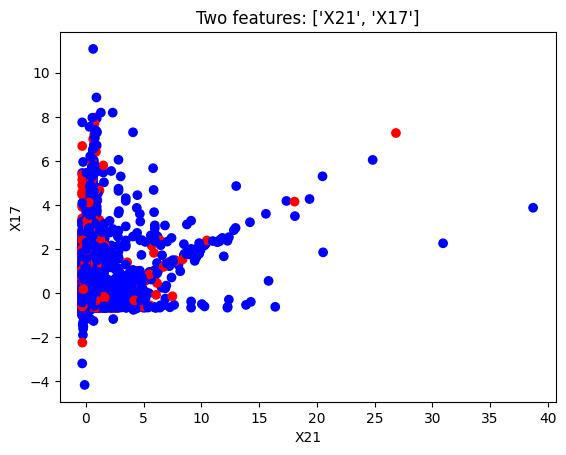

In [36]:
random_two_features2 = ['X21' , 'X17']
two_feature_dataset2 = X_train[random_two_features2]
plot_two_features(two_feature_dataset2 , random_two_features2)

5 components fitted best the data, yielding the highest validation AUC score



In [37]:
twof_training_AUC2 , twof_valAUC2,two_feature_scores2, two_feature_val_scores2 = Gauss_mix(two_feature_dataset2 , num_comp = 5)
twof_training_AUC2 , twof_valAUC2

(0.45420424880618343, 0.4644609638778773)

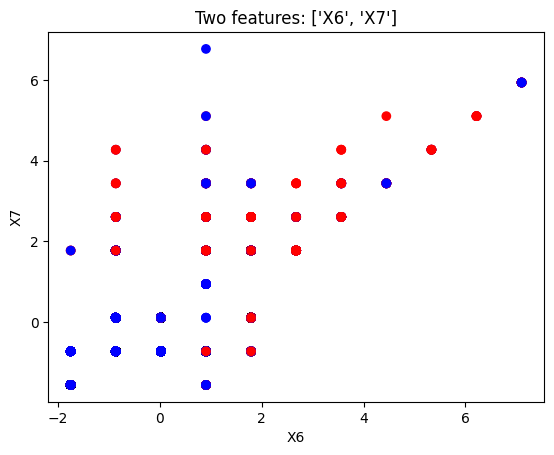

In [38]:
random_two_features3 = ['X6' , 'X7']
two_feature_dataset3 = X_train[random_two_features3]
plot_two_features(two_feature_dataset3 , random_two_features3)

4 components fitting best the data yielding the highest validation AUC score



In [39]:
twof_training_AUC3 , twof_valAUC3, two_feature_scores3, two_feature_val_scores3 = Gauss_mix(two_feature_dataset3 , num_comp = 4)
twof_training_AUC3 , twof_valAUC3

(0.6812455913137081, 0.688085792729697)

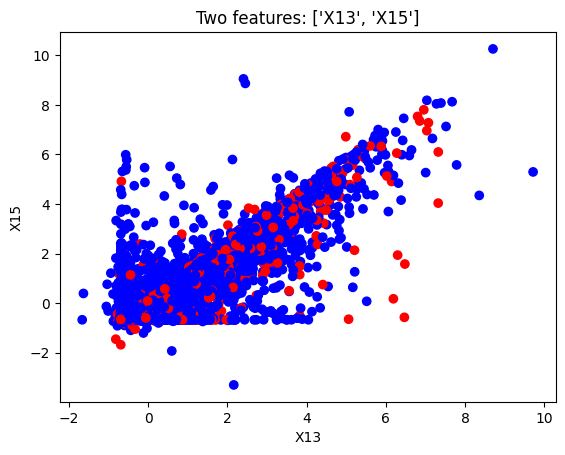

In [40]:
random_two_features4 = ['X13' , 'X15']
two_feature_dataset4 = X_train[random_two_features4]
plot_two_features(two_feature_dataset4 , random_two_features4)

It looks like a 1 component Gaussian can fit this data

In [41]:
twof_training_AUC4 , twof_valAUC4, two_feature_scores4, two_feature_val_scores4 = Gauss_mix(two_feature_dataset4 , num_comp = 1)
twof_training_AUC4 , twof_valAUC4


(0.45274713504816566, 0.4501270976852881)

In [42]:
twof_val_list = [twof_valAUC1 , twof_valAUC2, twof_valAUC3,twof_valAUC4]
max_val_AUC = max(twof_val_list)
print('The maximum AUC score achieved on the validation set is: ', max_val_AUC , 'for features: ', random_two_features3 )

The maximum AUC score achieved on the validation set is:  0.688085792729697 for features:  ['X6', 'X7']


In [43]:
#Finding the optimal threshold

tr_list = np.sort(np.unique(two_feature_val_scores3))
f1_tr = -999999
best_tr = None
f1_list=[]

for tr in tr_list:

    f1 = f1_score(y_val, two_feature_val_scores3<=tr)
    f1_list.append(f1)

    if f1>f1_tr:
      f1_tr=f1
      best_tr = tr

print("The maximum F1 score is:" , f1_tr,' for a threshold value equal to: ', best_tr )


The maximum F1 score is: 0.4961904761904762  for a threshold value equal to:  -3.296070907985894


Text(0, 0.5, 'F1 Score')

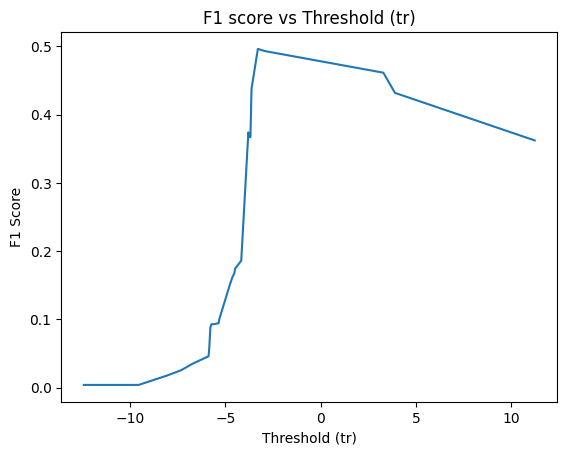

In [44]:
plt.plot(tr_list , f1_list)
plt.title('F1 score vs Threshold (tr)')
plt.xlabel('Threshold (tr)')
plt.ylabel('F1 Score')

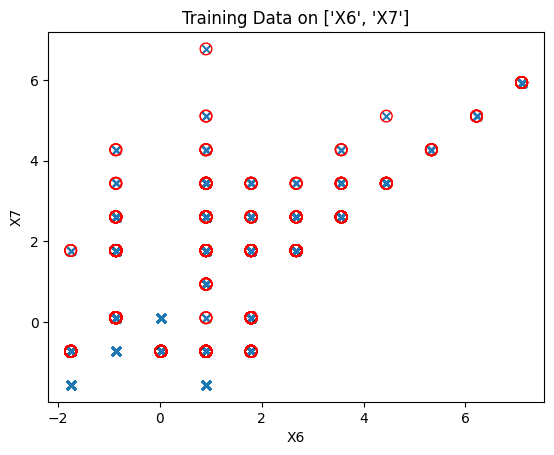

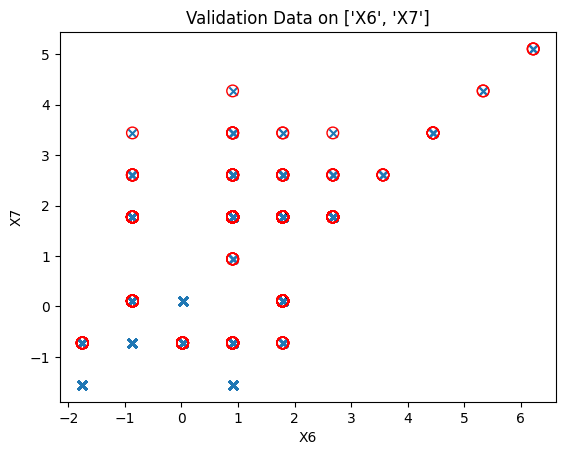

In [45]:
outliers_train = np.nonzero(two_feature_scores3<=best_tr)[0]
outliers_val = np.nonzero(two_feature_val_scores3<=best_tr)[0]

X_train_outliers = X_train.iloc[outliers_train]
X_val_outliers = X_val.iloc[outliers_val]

plt.scatter(X_train[random_two_features3[0]], X_train[random_two_features3[1]], marker='x')
plt.scatter(X_train_outliers[random_two_features3[0]], X_train_outliers[random_two_features3[1]], marker='o', facecolor="none", edgecolor="r",s=70)
plt.title(f'Training Data on {random_two_features3}')
plt.xlabel(random_two_features3[0])
plt.ylabel(random_two_features3[1])
plt.show()
plt.close()

plt.scatter(X_val[random_two_features3[0]], X_val[random_two_features3[1]], marker='x')
plt.scatter(X_val_outliers[random_two_features3[0]], X_val_outliers[random_two_features3[1]], marker='o', facecolor="none", edgecolor="r",s=70)
plt.title(f'Validation Data on {random_two_features3}')
plt.xlabel(random_two_features3[0])
plt.ylabel(random_two_features3[1])
plt.show()
plt.close()



## **Part 4:  Two Gaussian model with single feature. [3 Marks]**
Now we will use two separate distributions for default and non-default clients.
  1.  Fit a Gaussian distribution ($G_1$) on a feature of **non-default clients** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  2. Fit another Gaussian distribution ($G_2$) on the same feature but for **default clients** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  3. Compute the score samples ($S$) for both $G_1$ and $G_2$ on the **validation set** to get $S_1$ and $S_2$, respectively. **[0.5]**
  4. Find an optimal $c$ (a real number) that maximizes validation set F1 Score for a model such that if $S_1 < c \times S_2$, the client is classified as default. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$, ($S_1$<$S_2$) then the client is default (the client belongs to the $G_2$ distribution which represents default clients). For start consider $c$ in $[0,10]$ with steps of 0.1, you can change this window in your experiments if needed. **[0.5]**
  5. Repeat the steps above for all the features. What is the best F1 Score, Precision and Recall that you get for training and validation? Which feature and what c? Show your results in a table. **[0.5]**
    * All results are shown in tables below which are sorted based on F1-Score, Recall , Precision. The best c and corresponding feature can be found at the top of the table
  6. Can we report AUC for this model? Why? **[0.5]**
    * No we can not report the AUC in this case because we are not finding the TPR and TNR rate but rather classifying based on $S_1 < c \times S_2$ and therefore finding the optimal value of c

In [46]:
from sklearn.metrics import precision_score , recall_score

In [61]:
### YOUR CODE HERE ###

def two_gaussian_model(X_train, y_train , X_val , y_val, n_default = 1, n_non_default = 1):

  X_train_0 = X_train[y_train==0]
  X_train_1 = X_train[y_train==1]

  gm0 = GaussianMixture(n_components=n_non_default)
  gm1 = GaussianMixture(n_components=n_default)

  gm0.fit(X_train_0)
  gm1.fit(X_train_1)

  train_results_0 = gm0.score_samples(X_train)
  val_results_0 = gm0.score_samples(X_val)

  train_results_1 = gm1.score_samples(X_train)
  val_results_1 = gm1.score_samples(X_val)

  opt_c = None
  best_f1 = -999999

  for c in np.arange(0,10,0.1):
    f1 = f1_score(y_val, val_results_0 <= c * val_results_1)
    if f1 > best_f1:
        opt_c, best_f1 = c, f1


  precision_train = precision_score(y_train, train_results_0 <= opt_c * train_results_1)
  recall_train = recall_score(y_train, train_results_0 <= opt_c * train_results_1)


  precision_val = precision_score(y_val, val_results_0 <= opt_c * val_results_1)
  recall_val = recall_score(y_val, val_results_0 <= opt_c * val_results_1)


  return train_results_0, val_results_0, train_results_1 , val_results_1, opt_c , best_f1, precision_train , recall_train , precision_val, recall_val



In [62]:
#function call
data = {}
features = [f for f in df.columns if not 'Y' in f and not 'Unnamed: 0' in f]

for i,feature in enumerate(features):
  train_results_0, val_results_0, train_results_1 , val_results_1, opt_c , best_f1, precision_train , recall_train , precision_val, recall_val = two_gaussian_model(X_train[[feature]], y_train , X_val[[feature]] , y_val, n_default= 1 , n_non_default = 1)
  data[i] = [best_f1, opt_c , precision_train , precision_val , recall_train , recall_val]

table = [data[i] for i in data.keys()]


In [63]:
columns = ['best_f1', 'opt_c' , 'precision_train' , 'precision_val' , 'recall_train' , 'recall_val']
comparison_df = pd.DataFrame(data = table , columns = columns , index = features)

In [64]:
comparison_df.sort_values(by=['best_f1'] , ascending = False).head()

,best_f1,opt_c,precision_train,precision_val,recall_train,recall_val
X6,0.499757,0.9,0.505932,0.483992,0.513991,0.516583
X7,0.461538,1.3,0.558699,0.567449,0.369780,0.388945
X8,0.424954,1.3,0.515704,0.551282,0.328670,0.345729
X1,0.396308,1.2,0.284981,0.285588,0.657124,0.647236
X9,0.394567,1.0,0.532542,0.553539,0.280026,0.306533


In [65]:
# Best training precision
comparison_df.sort_values(by=['precision_train'] , ascending = False).head()

,best_f1,opt_c,precision_train,precision_val,recall_train,recall_val
X7,0.461538,1.3,0.558699,0.567449,0.369780,0.388945
X9,0.394567,1.0,0.532542,0.553539,0.280026,0.306533
X8,0.424954,1.3,0.515704,0.551282,0.328670,0.345729
X6,0.499757,0.9,0.505932,0.483992,0.513991,0.516583
X1,0.396308,1.2,0.284981,0.285588,0.657124,0.647236


In [66]:
# Best validation precision
comparison_df.sort_values(by=['precision_val'] , ascending = False).head()

,best_f1,opt_c,precision_train,precision_val,recall_train,recall_val
X7,0.461538,1.3,0.558699,0.567449,0.369780,0.388945
X9,0.394567,1.0,0.532542,0.553539,0.280026,0.306533
X8,0.424954,1.3,0.515704,0.551282,0.328670,0.345729
X6,0.499757,0.9,0.505932,0.483992,0.513991,0.516583
X1,0.396308,1.2,0.284981,0.285588,0.657124,0.647236


In [67]:
# Best training recall
comparison_df.sort_values(by=['recall_train'] , ascending = False).head()

,best_f1,opt_c,precision_train,precision_val,recall_train,recall_val
X12,0.362147,0.0,0.221238,0.221111,1.0,1.0
X2,0.362147,0.0,0.221238,0.221111,1.0,1.0
X4,0.362147,0.0,0.221238,0.221111,1.0,1.0
X5,0.362147,0.0,0.221238,0.221111,1.0,1.0
X17,0.362147,0.0,0.221238,0.221111,1.0,1.0


In [68]:
# Best recall val
comparison_df.sort_values(by=['recall_val'] , ascending = False).head()

,best_f1,opt_c,precision_train,precision_val,recall_train,recall_val
X12,0.362147,0.0,0.221238,0.221111,1.0,1.0
X2,0.362147,0.0,0.221238,0.221111,1.0,1.0
X4,0.362147,0.0,0.221238,0.221111,1.0,1.0
X5,0.362147,0.0,0.221238,0.221111,1.0,1.0
X17,0.362147,0.0,0.221238,0.221111,1.0,1.0


## **Part 5: Multivariate and Mixture of Gaussians Distribution [3 Marks]**
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model, you can benefit from:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate).
*   To fit your model, you can take advantage of the Gaussian mixture model where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html).
*   You can choose to fit your Gaussians on non-default clients or to both classes.


It is up to you how to design your model. Try at least 10 different models and report the AUC for both training and validation sets (if applicable) and the best F1 score, Precision and Recall (after tuning the threshold) for both training and validation sets for each model. What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? Summarize your findings with tables or plots. **[3]**


**HINT !**

You might want to try a two gaussian model, multiple features, single component for valid clients and multiple components for default ones! Why does it make sense to have multiple components for the default clients?

In [75]:
### YOUR CODE HERE ###

results = {}

#trying different number of components on all features fitting a single gaussian:

for i in range(1,5):

  gm = GaussianMixture(n_components=i)
  fit_result  = gm.fit(X_train)
  fit_scores = gm.score_samples(X_train)
  fpr_sc, tpr_sc, _ = roc_curve(y_train, -1 * fit_scores)
  train_AUC = auc(fpr_sc, tpr_sc)

  fit_scores_val = gm.score_samples(X_val)
  fpr_sc_val,  tpr_sc_val, _ = roc_curve(y_val, -1 * fit_scores_val)
  val_AUC = auc(fpr_sc_val,  tpr_sc_val)

  tr_range = np.linspace(min(fit_scores_val) , max(fit_scores_val) , 100)
  best_f1 = -9999
  best_tr=None

  for tr in tr_range:
    f1 = f1_score(y_val , fit_scores_val<=tr)

    if f1>best_f1:
      best_f1 = f1
      best_tr = tr

  training_precision = precision_score(y_train, fit_scores <= best_tr)
  training_recall = recall_score(y_train , fit_scores <= best_tr)
  validation_precision = precision_score(y_val, fit_scores_val <= best_tr)
  validation_recall = recall_score(y_val , fit_scores_val <= best_tr)


  results[f'n_components_{i}'] = [best_f1 , best_tr ,None, train_AUC , val_AUC , training_precision , validation_precision , training_recall, validation_recall]



In [76]:
#Trying a double gaussian model with single component for default customers and n components for non_default customers
for i in range(1,5):

  train_results_0, val_results_0, train_results_1 , val_results_1, opt_c , best_f1, precision_train , recall_train , precision_val, recall_val = two_gaussian_model(X_train, y_train , X_val , y_val, n_default = i , n_non_default = 1)
  results[f'double_gaussian_{i}_non_def_component'] = [best_f1,None, opt_c , None , None, precision_train , precision_val , recall_train , recall_val]


In [77]:
#Trying a double gaussian model with a permutation of the best three features.

for i in range(len(best_features)-1):
  for j in range(i+1,len(best_features)):

    gm = GaussianMixture(n_components=1)
    two_feature_dataset = X_train[[best_features[i] , best_features[j]]]
    fit_result  = gm.fit(two_feature_dataset)
    fit_scores = gm.score_samples(two_feature_dataset)
    fpr_sc, tpr_sc, _ = roc_curve(y_train, -1 * fit_scores)
    train_AUC = auc(fpr_sc, tpr_sc)

    fit_scores_val = gm.score_samples(X_val[[best_features[i] , best_features[j]]])
    fpr_sc_val,  tpr_sc_val, _ = roc_curve(y_val, -1 * fit_scores_val)  #threshold output here.
    val_AUC = auc(fpr_sc_val,  tpr_sc_val)

    tr_range = np.linspace(min(fit_scores_val) , max(fit_scores_val) , 100)
    best_f1 = -9999
    best_tr=None

    for tr in tr_range:
      f1 = f1_score(y_val , fit_scores_val<=tr)

      if f1>best_f1:
        best_f1 = f1
        best_tr = tr

    training_precision = precision_score(y_train, fit_scores <= best_tr)
    training_recall = recall_score(y_train , fit_scores <= best_tr)
    validation_precision = precision_score(y_val, fit_scores_val <= best_tr)
    validation_recall = recall_score(y_val , fit_scores_val <= best_tr)


    results[f'best_features_{i}_and_{j}_w_1_component'] = [best_f1 , best_tr ,None, train_AUC , val_AUC , training_precision , validation_precision , training_recall, validation_recall]


In [78]:
# Trying to fit i components for non-default set and j components for the default set

for i in range(1,3):
  for j in range(1,3):
    train_results_0, val_results_0, train_results_1 , val_results_1, opt_c , best_f1, precision_train , recall_train , precision_val, recall_val = two_gaussian_model(X_train, y_train , X_val , y_val, n_default = j , n_non_default = i)
    results[f'double_gaussian_{i}_non_def_comp_{j}_def_comp'] = [best_f1,None, opt_c , None , None, precision_train , precision_val , recall_train , recall_val]



In [79]:
columns = ['best_f1' , 'best_tr' ,'opt_c', 'train_AUC' , 'val_AUC' , 'training_precision' , 'validation_precision' , 'training_recall', 'validation_recall']
row_index = [k for k in results.keys()]
table_content = [results[k] for k in results.keys()]
results_dataframe = pd.DataFrame(data = table_content , columns=columns , index  = row_index)

In [80]:
results_dataframe

,best_f1,best_tr,opt_c,train_AUC,val_AUC,training_precision,validation_precision,training_recall,validation_recall
n_components_1,0.362147,-13.733079,NaN,0.589605,0.586367,0.221317,0.221111,0.999785,1.000000
n_components_2,0.362147,6.561878,NaN,0.461976,0.456754,0.221280,0.221111,1.000000,1.000000
n_components_3,0.362147,18.159312,NaN,0.424509,0.419363,0.221301,0.221111,1.000000,1.000000
n_components_4,0.362147,24.682856,NaN,0.451934,0.448638,0.221212,0.221111,0.999785,1.000000
double_gaussian_1_non_def_component,0.490305,NaN,1.3,NaN,NaN,0.464881,0.453459,0.534223,0.533668
double_gaussian_2_non_def_component,0.439189,NaN,1.0,NaN,NaN,0.310496,0.305045,0.790142,0.783920
double_gaussian_3_non_def_component,0.401822,NaN,1.9,NaN,NaN,0.273732,0.273923,0.746018,0.753769
double_gaussian_4_non_def_component,0.395993,NaN,2.0,NaN,NaN,0.267988,0.268406,0.747955,0.754774
best_features_0_and_1_w_1_component,0.473495,-3.164235,NaN,0.684331,0.681215,0.394726,0.392338,0.592768,0.596985
best_features_0_and_2_w_1_component,0.479653,-3.648994,NaN,0.693331,0.700715,0.523353,0.521226,0.446190,0.444221


In [81]:
sorted_results_by_f1 = results_dataframe.sort_values(by = ['best_f1'] , ascending = False)
sorted_results_by_f1

,best_f1,best_tr,opt_c,train_AUC,val_AUC,training_precision,validation_precision,training_recall,validation_recall
double_gaussian_1_non_def_component,0.490305,NaN,1.3,NaN,NaN,0.464881,0.453459,0.534223,0.533668
double_gaussian_1_non_def_comp_1_def_comp,0.490305,NaN,1.3,NaN,NaN,0.464881,0.453459,0.534223,0.533668
best_features_0_and_2_w_1_component,0.479653,-3.648994,NaN,0.693331,0.700715,0.523353,0.521226,0.446190,0.444221
best_features_0_and_1_w_1_component,0.473495,-3.164235,NaN,0.684331,0.681215,0.394726,0.392338,0.592768,0.596985
best_features_1_and_2_w_1_component,0.471398,-3.053812,NaN,0.646943,0.654766,0.479092,0.498320,0.431554,0.447236
double_gaussian_2_non_def_component,0.439189,NaN,1.0,NaN,NaN,0.310496,0.305045,0.790142,0.783920
double_gaussian_1_non_def_comp_2_def_comp,0.439189,NaN,1.0,NaN,NaN,0.310418,0.305045,0.790142,0.783920
double_gaussian_2_non_def_comp_2_def_comp,0.428679,NaN,1.3,NaN,NaN,0.346730,0.343202,0.583082,0.570854
double_gaussian_3_non_def_component,0.401822,NaN,1.9,NaN,NaN,0.273732,0.273923,0.746018,0.753769
double_gaussian_4_non_def_component,0.395993,NaN,2.0,NaN,NaN,0.267988,0.268406,0.747955,0.754774


## **Part 6: Evaluating performance on test set: [1 Mark]**
**Which model worked better?** Pick your best model among all models and apply it to your test set. Report the F1 Score, Precision and Recall on the test set. **[1]**

  * The best model was a single component gaussian model fitted to the first and last best feature found in the previous part.

In [82]:
### YOUR CODE HERE ###

# The best model was a single component gaussian model fitted on the default and full dataset, with a value of c equal to 1.3


X_train_0 = X_train[y_train==0]
X_train_1 = X_train[y_train==1]

gm0 = GaussianMixture(n_components=1)
gm1 = GaussianMixture(n_components=1)

gm0.fit(X_train_0)
gm1.fit(X_train_1)

test_results_0 = gm0.score_samples(X_test)
test_results_1 = gm1.score_samples(X_test)

opt_c = 1.3

best_f1_test = f1_score(y_test, test_results_0 <= opt_c * test_results_1)

test_precision = precision_score(y_test, test_results_0 <= opt_c * test_results_1)
test_recall = recall_score(y_test, test_results_0 <= opt_c * test_results_1)



print("The best F1 score on the test set is: ", best_f1_test,' corresponding to a c value of: ', opt_c)
print("The test precision score is: ", test_precision)
print("The test recall score is: ", test_recall)


The best F1 score on the test set is:  0.4873000940733772  corresponding to a c value of:  1.3
The test precision score is:  0.45800176834659595
The test recall score is:  0.5206030150753769


## **Part 7: Is Gaussian the only useful distribution? [1 Mark]**

Search for other distributions that could be used to model the data. How popular are they? Is there a specific situation where a distribution works better? How can we find a suitable distribution to model our data? Do not forget to include your references.





Besides the Gaussian distribution, there are several other distributions commonly used in modeling, including the lognormal distribution, uniform distribution, exponential distribution, gamma distribution, beta distribution, weibull distribution, and more. These distributions have gained popularity in real-life data analysis due to the recognition that not all data conforms to a normal distribution. Real-world phenomena often possess inherent boundaries, leading to data clustering near these limits or displaying skewness, deviating from the assumption of a symmetric normal distribution.

For instance, when modeling stock prices, the lognormal distribution is preferred since stock prices cannot be negative and have a lower bound of zero. Another important consideration is that if the continuously compounded returns of a stock follow a normal distribution, the stock prices naturally follow a lognormal distribution.

Determining the appropriate distribution to model data involves several steps. Initially, plotting a histogram of the data provides an overview. If one is familiar with the functional forms and shapes of various distributions, they can select candidate distributions for fitting the data. Alternatively, all available distributions can be tested. To identify the most suitable distribution, goodness-of-fit tests such as various metrics, Q-Q plots, moment matching, and statistical tests can be employed. Finally, some data can not be modeled by a specific distribution and therefore non parametric methods or machine learning algorthims can be used to learn the underlying distribution of data.

Reference:

https://financetrain.com/why-lognormal-distribution-is-used-to-describe-stock-prices

https://statisticsbyjim.com/hypothesis-testing/identify-distribution-data/

http://wiki.analytica.com/Choosing_an_appropriate_distribution

https://www.researchgate.net/post/How-can-I-determine-the-suitable-probability-distribution-for-a-data

## **Bonus Part: Using the Precision Recall Curve: [1 Mark]**
Repeat Part 2 using the Precision Recall Curve instead of the ROC curve.

In [83]:
from sklearn.metrics import precision_recall_curve

In [84]:

features = [f for f in df.columns if not 'Y' in f and not 'Unnamed: 0' in f]


# 1. fitting data to one single feature:

random_feat_indx = np.random.randint(len(features) , size=1)
random_feat = features[random_feat_indx[0]]
single_feat_train = X_train[[random_feat]]
single_feat_val = X_val[[random_feat]]
gm = GaussianMixture(n_components=1)
single_feat_fit = gm.fit(single_feat_train)
single_feat_results = gm.score_samples(single_feat_train)
single_feat_val_results = gm.score_samples(single_feat_val)

precision_train , recall_train, _ = precision_recall_curve(y_train, -1* single_feat_results)
precision_val , recall_val, _ = precision_recall_curve(y_val, -1* single_feat_val_results)

# 2. Compute the AUC for the chosen feature
train_AUC = auc(recall_train, precision_train)
val_AUC = auc(recall_val , precision_val)

print("The random feature is: ", random_feat)
print("The training AUC score is :" , train_AUC)
print('The validation AUC score is: ', val_AUC )

The random feature is:  X22
The training AUC score is : 0.21357358160475737
The validation AUC score is:  0.2044446427688692


In [85]:
#computing the auc based on the precision and recall curve for all the features

def single_gauss_PR_curve(n , X_train , y_tain, X_val , y_val):

  gm = GaussianMixture(n_components = n)
  gm.fit(X_train)
  training_scores = gm.score_samples(X_train)
  validation_scores = gm.score_samples(X_val)

  tr_list = np.unique(np.sort(validation_scores))

  f1_best = -99999
  tr_best = None

  for tr in tr_list:
    f1 = f1_score(y_val , validation_scores<=tr)

    if f1>f1_best:
      f1_best = f1
      tr_best = tr


  precision_train , recall_train, _ = precision_recall_curve(y_train, -1* training_scores)
  precision_val , recall_val, _ = precision_recall_curve(y_val, -1* validation_scores)

  train_AUC = auc(recall_train, precision_train)
  val_AUC = auc(recall_val , precision_val)


  prec_train = precision_score(y_train, training_scores <= tr_best)
  prec_val = precision_score(y_val, validation_scores <= tr_best)
  recall_train = recall_score(y_train, training_scores <= tr_best)
  recall_val = recall_score(y_val, validation_scores <= tr_best)

  return training_scores , validation_scores , f1_best, tr_best, train_AUC, val_AUC , prec_train, prec_val, recall_train, recall_val




In [86]:
res_PR = {}
for feature in features:
  _ , _ , f1_best, tr_best, train_AUC, val_AUC , prec_train, prec_val, recall_train, recall_val = single_gauss_PR_curve(1 , X_train[[feature]],y_train , X_val[[feature]], y_val)
  res_PR[f'{feature}'] = [f1_best, tr_best, train_AUC, val_AUC , prec_train, prec_val, recall_train, recall_val]


In [87]:
data = [res_PR[key] for key in res_PR.keys()]
index = [key for key in res_PR.keys()]
columns = ['f1_best', 'tr_best', 'train_AUC', 'val_AUC' , 'prec_train', 'prec_val', 'recall_train', 'recall_val']
res_PR_df = pd.DataFrame(data , columns = columns , index = index)

In [88]:
res_PR_df

,f1_best,tr_best,train_AUC,val_AUC,prec_train,prec_val,recall_train,recall_val
X1,0.366440,-0.934800,0.216828,0.219787,0.226968,0.228807,0.911537,0.919598
X2,0.362147,-1.246664,0.400375,0.397768,0.221238,0.221111,1.000000,1.000000
X3,0.362147,-0.935951,0.204203,0.199544,0.221238,0.221111,1.000000,1.000000
X4,0.362147,-1.282705,0.229383,0.254110,0.221238,0.221111,1.000000,1.000000
X5,0.362147,-0.920259,0.239502,0.245144,0.221238,0.221111,1.000000,1.000000
X6,0.464490,-1.327988,0.467740,0.456894,0.394788,0.391065,0.567370,0.571859
X7,0.461538,-2.494487,0.408556,0.416302,0.558699,0.567449,0.369780,0.388945
X8,0.424954,-2.540866,0.383494,0.393331,0.515704,0.551282,0.328670,0.345729
X9,0.394567,-2.717314,0.378380,0.389454,0.532569,0.553539,0.279811,0.306533
X10,0.366587,-2.085906,0.375706,0.377967,0.337493,0.349091,0.384201,0.385930


In [89]:
#sorting for best features
top_three = res_PR_df.sort_values(by=['f1_best'] , ascending = False).index[:3].values
print('The best three features based on the F1 score are: ' , top_three)

The best three features based on the F1 score are:  ['X6' 'X7' 'X8']


In [90]:
#fitting on non_default clients

y_train_non_def_2 = y_train[y_train==0]
y_val_non_def_2 = y_val[y_val==0]
res_PR_non_def ={}

for feature in top_three:

  X_train_non_def_2 = X_train[feature][y_train==0]
  X_val_non_def_2 = X_val[feature][y_val==0]
  _ , _ , f1_best, tr_best, train_AUC_non_def, val_AUC_non_def , prec_train_non_def, prec_val_non_def, recall_train_non_def, recall_val_non_def = single_gauss_PR_curve(1 , X_train[[feature]],y_train , X_val[[feature]], y_val)
  res_PR_non_def[f'feature_{feature}_on_non_def'] = [f1_best, tr_best, train_AUC_non_def, val_AUC_non_def , prec_train_non_def, prec_val_non_def, recall_train_non_def, recall_val_non_def]

In [91]:
data2 = [res_PR_non_def[key] for key in res_PR_non_def.keys()]
index = [key for key in res_PR_non_def.keys()]

res_PR_non_def_df = pd.DataFrame(data2 , columns = columns , index = index)
res_PR_non_def_df

,f1_best,tr_best,train_AUC,val_AUC,prec_train,prec_val,recall_train,recall_val
feature_X6_on_non_def,0.464490,-1.327988,0.467740,0.456894,0.394788,0.391065,0.56737,0.571859
feature_X7_on_non_def,0.461538,-2.494487,0.408556,0.416302,0.558699,0.567449,0.36978,0.388945
feature_X8_on_non_def,0.424954,-2.540866,0.383494,0.393331,0.515704,0.551282,0.32867,0.345729


In [92]:
comparison_data = pd.concat([res_PR_non_def_df[['f1_best' , 'val_AUC']] ,res_PR_df[['f1_best' , 'val_AUC']].sort_values(by = ['f1_best'] , ascending=False).iloc[:3]] , axis=0)

In [ ]:
comparison_data

,f1_best,val_AUC
feature_X6_on_non_def,0.464490,0.456894
feature_X7_on_non_def,0.461538,0.416302
feature_X8_on_non_def,0.424954,0.393331
X6,0.464490,0.456894
X7,0.461538,0.416302
X8,0.424954,0.393331


**Answer to the question:**
The best F1 score and the best validation AUC score did not change when solely training on the non_default class because of the imbalance present in the data.

In [ ]:
%%shell

jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
